# Join Tc for Cv and Suscept


In [3]:
import sys
sys.path.append('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\Varios_vecinos\\venv\\src')

In [4]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
import style
from ising.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


C:\Users\MHJGuillermo\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['interp', 'style']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
data_path = Path("../../../data/h-1/alpha_2.0").resolve()
file = 'Tc_Cv_and_suscept.csv'
df_all_tc = pd.read_csv(os.path.join(data_path,file))

In [8]:
df_all_tc.head()

,nv,tc_cv,tc_suscept,inv_tc_cv,inv_tc_suscept
0,2,2.453835,3.300195,0.407525,0.303012
1,3,2.641915,3.539570,0.378513,0.282520
2,4,2.755252,3.685882,0.362943,0.271305
3,5,2.828530,3.784807,0.353541,0.264214
4,6,2.882267,3.854421,0.346949,0.259442


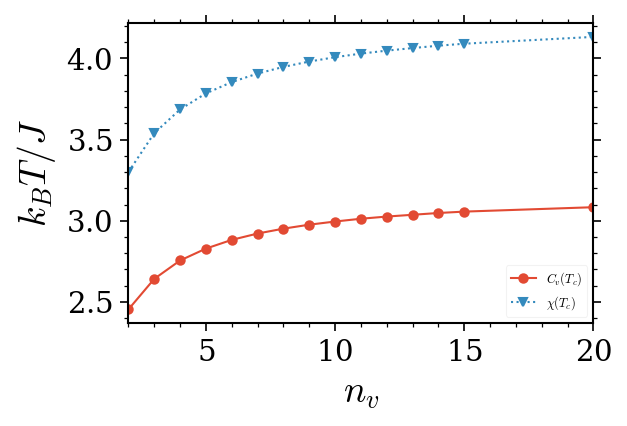

In [18]:
# Load the default style.
style.use("default")
# rcParams["text.usetex"] = False
markers = ["o","v","s","P","p","*","h","D","X","8"]
line_styles = ["solid","dotted","dashed","dashdot",
               (0,(1,1)),(0,(5,1)),(0,(3,1,1,1)),(0,(3,1,1,1,1,1)),(0,(1,10)),(0,(5,10)),(0,(3,10,1,10))]
labels = ["C_v(T_c)",
          "\chi(T_c)"
         ]

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])

COLUMNS = ['tc_cv',
           'tc_suscept'
          ]
    
for index, COLUMN in enumerate(COLUMNS):
    #get data
    x_data = df_all_tc["nv"].values
    y_data = df_all_tc[COLUMN].values
            
    ax.plot(x_data, y_data, marker=markers[index],
               color='C'+str(index),
               lw=1,
               linestyle=line_styles[index],
               label = r"${}$".format(labels[index])
           )

# ticks configuration
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

# labels configurations
ax.xaxis.label.set_size(18)
ax.set_xlabel(r"$n_v$")

ax.yaxis.label.set_size(18)
ax.set_ylabel(r"$k_BT/J$")
# ax.axvline(x=1,linestyle='--')

# ax.set_ylim(0,0.6)
ax.set_xlim(2, 20)

ax.legend(
          loc ="lower right",
          fontsize = 6)

pyplot.draw()
pyplot.show()